# How To: Random Forest Classification

The science of machine learning was coined over half a century ago. Ever since, progress in this field has been on a major growth trajectory. Its increase in popularity stems from its versatility, applicability, and pioneering efforts. 

Machine learning is an applicable branch of artificial intelligence. Its purpose is to grant computers the power of intuition. As a result, the program would be better suited to perform its given tasks. The core concept of machine learning lies in the process of gaining experience to enhance task performance. 
	
One of the most popular machine learning algorithms is random forest classification.

## About Random Forest Classification

Random forest is an algorithm that predicts the classification of a target variable given other related metrics. This prediction is based on the algorithm’s pattern recognition abilities of an example training data set that the algorithm will observe, analyze, and learn from. The variables that affect the target prediction are called the features.

Random forest is classified as a parallel ensemble method. This means that its classification abilities are bolstered by the consideration of numerous weak, and less-detailed classifiers. Because it is a parallel method, these weak bases are created at the same time as the overarching classifier. Other ensemble method types include Bayes optimal classifier, boosting, and stacking. Random forest stands out amongst the others since it is currently the most accurate of classification models.


### How It Works

This algorithm is based off decision trees. The decision trees are the weak learners in this algorithm. Bunched together, they create a “forest.” The forest is representative of the reliable and learned classifier that is created by the random forest algorithm. 

The first metric considered that impacts the target for prediction will insert its categorical value at the top of the decision tree, or weak learner. As more metrics are considered, their values will branch the tree accordingly. The categorical conditions of all superior roots of a node are shared with all corresponding lower-level branches. At the bottom of each tree are leaves. They represent unique combinations of the possible values of all considered metrics. This unique combination helps the algorithm categorize and classify new data points to their best fit leaf within the existing trees.

The forest classifiers have many attributes that describe the created trees. A few notable attributes include depth, the number of levels in the trees, and the number of trees in the forest. The forest as a whole is what is used by the classification algorithm to create a classifier. These attributes are important to note as they are essential to creating the classifiers, and defining the simplicity/complexity of the classifier.

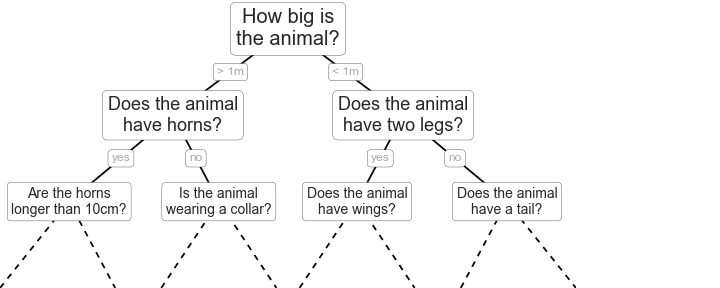

Consider the tree displayed above. Each node contains a question that represents metrics that are being considered for prediction - these are the features. Considering the value response to each question, "yes" or "no", the tree branches in two different directions. Each leaf at the bottom of the tree would be representative of characteristics describing each animal in the data set that this tree was based off of. This tree is perfect to predict the target variable which can be inferred to be the type of animal each data point corresponds with in this data set.

### Application

The application of the random forest classification algorithm is vast.  

Examples include:
 - machine fault diagnosis: the diagnosis of the machine fault is the target prediction; the workings of the machine are the feature metrics
 
 - tumor diagnosis: the diagnosis of the tumor as benign or cancerous is the target prediction; the patients' symptoms and tumor characteristics are the feature metrics
 
 - weather forecasts: whether or not it will rain is the target prediction; the present weather and other predicted weather characteristics are the feature metrics
 
 - stock trend forecasts: whether specific stock prices will increase or decrease is the target prediction; the historical trends serve as the feature metrics
 


Medical diagnosis, financial forecasts, technical diagnostics - what can't random forest do!

I hope that this range of impact inspires you to carefully understand the random forest method of classification, and encourages you to pursue your knowledge of this algorithm further. 

## Implementation

Random forest can be implemented in R; this tutorial, howeverm will delineate its implementation using Python, pandas, numpy, and scikit-learn libraries. 

The sikit-learn library has a function that performs the learning, and classification of the rando mforest algorithm for you. It performs the operation of creating, and analyzing the weak learners, decision trees, and grouping them together to generate the strong learned classifier that will hold the algorithm for predictions. This implementation section of this random forest tutorial will cover the procedure of creating, understanding, and using the classifier. For reference, let us first cover the random forest classification function.

Refer to the scikit-learn documentation for this function to explore the parameters it takes in, and its attributes:   
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html   

sklearn.ensemble.RandomForestClassifier()    

In the following implementation, we will cover the usage of the function, and the usage of its parameters that are most pertinent to the core operation of this algorithm. 

### Outline

(1) Import necessary libraries  
(2) Load example data  
(3) About the data set  
(4) Cleanse and organize the data  
(5) Convert data types as needed  
(6) Train and test data set implementation  
(7) Create the classifier using random forest   
(8) Use the classifier to make predictions   
(9) Observe the data   
(10) Analyze and assess the accuracy of the classifier    

** This implementation consists of general functions that can be applied on any data set. Their display will be intertwined with exemplified usage with the example data set.

#### (1) Import Libraries

The comments below clarify the use of each imported library and function for this tutorial's purposes.

In [1]:
# library to work with supported dataframe type in python for view and maniuplation
import pandas as pd

# library to work with scientific computing and vectorization to manipulate pandas dataframe
import numpy as np

# library to perform calculations on vector data
import collections

# library to help arrange the data for the random forest classifier function
from sklearn import preprocessing 

# library to use and perform the predicitve portion of random forest classification funtion
from sklearn.ensemble import RandomForestClassifier

# library to determine success of the random forest implementation
from sklearn.metrics import accuracy_score

# library to show success in predictions 
from sklearn.metrics import confusion_matrix

#### (2) Load Data

In [2]:
def load_data(file):
    ''' 
    input: filename as a string
    output: pandas dataframe
    '''
    data = pd.read_csv(file)
    return data

In [3]:
df_mushrooms = load_data('expanded.txt')
pd.set_option('display.max_columns', 25)
display(df_mushrooms.head())
# swipe right/left on the dataframe to view all columns

,IS_EDIBLE,CAP_SHAPE,CAP_SURFACE,CAP_COLOR,BRUISES,ODOR,GILL_ATTACHMENT,GILL_SPACING,GILL_SIZE,GILL_COLOR,STALK_SHAPE,STALK_ROOT,STALK_SURFACE_ABOVE_RING,STALK_SURFACE_BELOW_RING,STALK_COLOR_ABOVE_RING,STALK_COLOR_BELOW_RING,VEIL_TYPE,VEIL_COLOR,RING_NUMBER,RING_TYPE,SPORE_PRINT_COLOR,POPULATION,HABITAT
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


#### (3) About This Data Set

In [4]:
def get_columns(df):
    '''
    input: pandas dataframe
    output: tuple(list of columns labels in the dataframe, the number of columns in the dataframe)
    '''
    cols = list(df.columns)
    collen = len(cols)
    return cols, collen

In [5]:
get_columns(df_mushrooms)

(['IS_EDIBLE',
  'CAP_SHAPE',
  'CAP_SURFACE',
  'CAP_COLOR',
  'BRUISES',
  'ODOR',
  'GILL_ATTACHMENT',
  'GILL_SPACING',
  'GILL_SIZE',
  'GILL_COLOR',
  'STALK_SHAPE',
  'STALK_ROOT',
  'STALK_SURFACE_ABOVE_RING',
  'STALK_SURFACE_BELOW_RING',
  'STALK_COLOR_ABOVE_RING',
  'STALK_COLOR_BELOW_RING',
  'VEIL_TYPE',
  'VEIL_COLOR',
  'RING_NUMBER',
  'RING_TYPE',
  'SPORE_PRINT_COLOR',
  'POPULATION',
  'HABITAT'],
 23)

In [6]:
def num_instances(df):
    '''
    input: pandas dataframe
    output: int (the number of rows in the dataframe)
    '''
    return len(df)

In [7]:
num_instances(df_mushrooms)

8416

This dataset contains 8,416 datapoints. Each instance contains values for each of the columns listed from get_columns. These instances show characteristics of mushrooms. We will use all columns, except 'is_edible' and 'veil_type' as characteristic feature metrics. We will remove 'veil_type' from our data (explanation to follow). Lastly, we will use 'is_edible' as our target prediction variable for our classifier and prediction functions. Given all feature metrics as described, our classifier will predict if any given mushroom instance is edible or poisonous.

Thus, this becomes a binary classification problem - the classifier will make target predictions on each mushroom instance to be edible or poisonous. 

NOTE: While this example is a binary classification problem, random forest classification is also able to perform multi class classification. An example of this would be using the 'gill_color' variable as the target prediction. Based on the dataframe header above, it can be seen that each mushroom instance would have to be classified into one of at least three classes: white, pink, brown.

#### (4) Cleanse Data

To perform preliminary data organization, the following function will drop the desired columns from the database. If specified, the function will also drop all rows that contain unassigned values.

The random forest classificaton function that we will use handles NaN values in the dataframe in one of two ways:  
(1) subtituting the NaN value with a rough average of all values in the relative column   
(2) subtstituting the NaN value with an average of the values in the relative column only from neighboring datapoints

In [8]:
def data_cleanse(df, del_cols, nanvals):
    if (len(del_cols)>0):
        df = df.drop(del_cols, axis=1)
    if (nanvals): 
        df = df.dropna()
    return df

#### (5) Categorical to Numerical Values

Prior to performing any machine learning approach, scikit requires all categorical values to be converted to numerical values. There are multiple ways to do this: 

(1) LabelEncoding: Each column has its own numerical categorical encoding for every possible value.

(2) OneHotEncoding: Each value in a column becomes its own column. This column is then set to either 0 or 1 (false or true) based on the presence of this value in a data instance.


In [9]:
def print_col_vals(df):
    cols, collen = get_columns(df)
    for col in cols:
        print(col, set(df[col]))
        print("\n")

First, let's learn about the various values that each column holds.

In [10]:
print_col_vals(df_mushrooms)

IS_EDIBLE {'EDIBLE', 'POISONOUS'}


CAP_SHAPE {'KNOBBED', 'FLAT', 'CONVEX', 'BELL', 'CONICAL', 'SUNKEN'}


CAP_SURFACE {'SCALY', 'SMOOTH', 'GROOVES', 'FIBROUS'}


CAP_COLOR {'PINK', 'CINNAMON', 'BUFF', 'GRAY', 'BROWN', 'RED', 'WHITE', 'YELLOW', 'PURPLE', 'GREEN'}


BRUISES {'NO', 'BRUISES'}


ODOR {'ANISE', 'ALMOND', 'FISHY', 'MUSTY', 'SPICY', 'PUNGENT', 'NONE', 'CREOSOTE', 'FOUL'}


GILL_ATTACHMENT {'ATTACHED', 'FREE'}


GILL_SPACING {'CLOSE', 'CROWDED'}


GILL_SIZE {'NARROW', 'BROAD'}


GILL_COLOR {'PINK', 'BUFF', 'GRAY', 'ORANGE', 'BROWN', 'CHOCOLATE', 'RED', 'WHITE', 'BLACK', 'PURPLE', 'YELLOW', 'GREEN'}


STALK_SHAPE {'ENLARGING', 'TAPERING'}


STALK_ROOT {'EQUAL', 'CLUB', '?', 'BULBOUS', 'ROOTED'}


STALK_SURFACE_ABOVE_RING {'SCALY', 'SMOOTH', 'SILKY', 'FIBROUS'}


STALK_SURFACE_BELOW_RING {'SCALY', 'SMOOTH', 'SILKY', 'FIBROUS'}


STALK_COLOR_ABOVE_RING {'PINK', 'CINNAMON', 'BUFF', 'GRAY', 'ORANGE', 'BROWN', 'RED', 'WHITE', 'YELLOW'}


STALK_COLOR_BELOW_RING {'PINK', 'CINNAMON', 

Since there is only one possible value in the 'veil_type' column, its value will not affect whether or not the mushroom instance is edible. Thus, we will drop this column. Additionally, data points containing NaN values will be dropped to increase precision in the data set.

In [11]:
df_mushrooms = data_cleanse(df_mushrooms, ['VEIL_TYPE'], True)

Let's confirm that the desired columns to be deleted have been removed.

In [12]:
get_columns(df_mushrooms)

(['IS_EDIBLE',
  'CAP_SHAPE',
  'CAP_SURFACE',
  'CAP_COLOR',
  'BRUISES',
  'ODOR',
  'GILL_ATTACHMENT',
  'GILL_SPACING',
  'GILL_SIZE',
  'GILL_COLOR',
  'STALK_SHAPE',
  'STALK_ROOT',
  'STALK_SURFACE_ABOVE_RING',
  'STALK_SURFACE_BELOW_RING',
  'STALK_COLOR_ABOVE_RING',
  'STALK_COLOR_BELOW_RING',
  'VEIL_COLOR',
  'RING_NUMBER',
  'RING_TYPE',
  'SPORE_PRINT_COLOR',
  'POPULATION',
  'HABITAT'],
 22)

In this example, we will use LabelEncoding since OneHotEncoding would result in an excessive number of columns considering the displayed values that are associated with each column as shown above.

In [13]:
def categorical_to_numerical(df):
    cols, vollen = get_columns(df)
    for col in cols:
        df[col] = df[col].astype('category').cat.codes
    return df

In [14]:
df_mushrooms = categorical_to_numerical(df_mushrooms)

In [15]:
display(df_mushrooms.head())

,IS_EDIBLE,CAP_SHAPE,CAP_SURFACE,CAP_COLOR,BRUISES,ODOR,GILL_ATTACHMENT,GILL_SPACING,GILL_SIZE,GILL_COLOR,STALK_SHAPE,STALK_ROOT,STALK_SURFACE_ABOVE_RING,STALK_SURFACE_BELOW_RING,STALK_COLOR_ABOVE_RING,STALK_COLOR_BELOW_RING,VEIL_COLOR,RING_NUMBER,RING_TYPE,SPORE_PRINT_COLOR,POPULATION,HABITAT
0,0,2,3,8,0,0,1,1,1,10,1,1,3,3,7,7,2,1,4,6,4,6
1,0,2,3,8,0,0,1,1,1,10,1,1,3,3,7,7,2,1,4,1,4,6
2,0,2,3,8,0,0,1,1,1,7,1,1,3,3,7,7,2,1,4,6,4,6
3,0,2,3,8,0,0,1,1,1,7,1,1,3,3,7,7,2,1,4,1,4,6
4,0,2,3,8,0,0,1,1,1,1,1,1,3,3,7,7,2,1,4,6,4,6


To confirm and understand exactly how the categorical data is being represented in numerical categories, we will view the columns and their corresponding values.

In [16]:
print_col_vals(df_mushrooms)

IS_EDIBLE {0, 1}


CAP_SHAPE {0, 1, 2, 3, 4, 5}


CAP_SURFACE {0, 1, 2, 3}


CAP_COLOR {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


BRUISES {0, 1}


ODOR {0, 1, 2, 3, 4, 5, 6, 7, 8}


GILL_ATTACHMENT {0, 1}


GILL_SPACING {0, 1}


GILL_SIZE {0, 1}


GILL_COLOR {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


STALK_SHAPE {0, 1}


STALK_ROOT {0, 1, 2, 3, 4}


STALK_SURFACE_ABOVE_RING {0, 1, 2, 3}


STALK_SURFACE_BELOW_RING {0, 1, 2, 3}


STALK_COLOR_ABOVE_RING {0, 1, 2, 3, 4, 5, 6, 7, 8}


STALK_COLOR_BELOW_RING {0, 1, 2, 3, 4, 5, 6, 7, 8}


VEIL_COLOR {0, 1, 2, 3}


RING_NUMBER {0, 1, 2}


RING_TYPE {0, 1, 2, 3, 4}


SPORE_PRINT_COLOR {0, 1, 2, 3, 4, 5, 6, 7, 8}


POPULATION {0, 1, 2, 3, 4, 5}


HABITAT {0, 1, 2, 3, 4, 5, 6}




How can we change the label encoding?

We will exemplify this with the 'bruises' attribute since it represents bruises as 0 and no bruises as 1.
This representation is not intuitive as it is standard for 0 to represent false and 1 to represent true. Thus, we will change the encoding such that bruises is represented as 1 and no bruises is represented as 0.  

We will do the same to the 'is_edible' attribute for the same reason.

NOTE: This is very specific to the dataset, columns, values, and encoding.

In [17]:
def change_encoding(df, col, condition, if_x, then_y):
    df[col] = np.where(condition, if_x, then_y)
    return df

In [18]:
df_mushrooms = change_encoding(df_mushrooms, 'BRUISES', df_mushrooms['BRUISES']==0, 1, 0)
df_mushrooms = change_encoding(df_mushrooms, 'IS_EDIBLE', df_mushrooms['IS_EDIBLE']==0, 1, 0)

In [19]:
display(df_mushrooms.head())

,IS_EDIBLE,CAP_SHAPE,CAP_SURFACE,CAP_COLOR,BRUISES,ODOR,GILL_ATTACHMENT,GILL_SPACING,GILL_SIZE,GILL_COLOR,STALK_SHAPE,STALK_ROOT,STALK_SURFACE_ABOVE_RING,STALK_SURFACE_BELOW_RING,STALK_COLOR_ABOVE_RING,STALK_COLOR_BELOW_RING,VEIL_COLOR,RING_NUMBER,RING_TYPE,SPORE_PRINT_COLOR,POPULATION,HABITAT
0,1,2,3,8,1,0,1,1,1,10,1,1,3,3,7,7,2,1,4,6,4,6
1,1,2,3,8,1,0,1,1,1,10,1,1,3,3,7,7,2,1,4,1,4,6
2,1,2,3,8,1,0,1,1,1,7,1,1,3,3,7,7,2,1,4,6,4,6
3,1,2,3,8,1,0,1,1,1,7,1,1,3,3,7,7,2,1,4,1,4,6
4,1,2,3,8,1,0,1,1,1,1,1,1,3,3,7,7,2,1,4,6,4,6


The data has now been "preprocessed" and is set up to create our training and test models.

#### (6) Create Training and Test Data Sets

The training data set is the data that the classifier will be trained with. The testing data set will be used to compare against the classifier's predictions to determine its accuracy. 

In [20]:
def create_train_test(df, train_pct, feat, target):
    is_train = np.random.uniform(0, 1, len(df)) 
    is_train = (is_train <= train_pct)
    df['is_train'] = is_train
    train_df = df[df['is_train']==True]
    test_df = df[df['is_train']==False]
    train_x = train_df[feat]
    train_y = train_df[target]
    test_x = test_df[feat]
    test_y = test_df[target]
    return df, train_x, train_y, test_x, test_y, train_df, test_df

train_x is the training data set that presents only the feature variables.  
train_y is the training data set that presents only the target variable, is_edible.  
test_x is the test data set that presents only the feature variables.  
test_y is the test data set that presents only the target variable, is_edible.  

In [21]:
feat, num = get_columns(df_mushrooms)
#exclude the target, is_edible, from the features
#exclude is_train from all dataframes because it is irrelevant to our training 
feat = feat[1:num]
target = 'IS_EDIBLE'
df_mushrooms, train_x, train_y, test_x, test_y, train_mushroom_df, test_mushroom_df = create_train_test(
                                                                                df_mushrooms, 0.70, feat, target)

In [22]:
print("full data set")
display(df_mushrooms.head())
print("full training data set")
display(train_mushroom_df.head())
print("full test data set")
display(test_mushroom_df.head())
print("train_x, the features in the training data set")
display(train_x.head())
print("train_y, the target column of the training data set")
display(train_y.head())
print("test_x, the features in the test data set")
display(test_x.head())
print("test_y, the target column of the test data")
display(test_y.head())

#swipe all the way to the right of the dataframes to view the is_train column in the full, test, train data sets

full data set


,IS_EDIBLE,CAP_SHAPE,CAP_SURFACE,CAP_COLOR,BRUISES,ODOR,GILL_ATTACHMENT,GILL_SPACING,GILL_SIZE,GILL_COLOR,STALK_SHAPE,STALK_ROOT,STALK_SURFACE_ABOVE_RING,STALK_SURFACE_BELOW_RING,STALK_COLOR_ABOVE_RING,STALK_COLOR_BELOW_RING,VEIL_COLOR,RING_NUMBER,RING_TYPE,SPORE_PRINT_COLOR,POPULATION,HABITAT,is_train
0,1,2,3,8,1,0,1,1,1,10,1,1,3,3,7,7,2,1,4,6,4,6,False
1,1,2,3,8,1,0,1,1,1,10,1,1,3,3,7,7,2,1,4,1,4,6,False
2,1,2,3,8,1,0,1,1,1,7,1,1,3,3,7,7,2,1,4,6,4,6,False
3,1,2,3,8,1,0,1,1,1,7,1,1,3,3,7,7,2,1,4,1,4,6,False
4,1,2,3,8,1,0,1,1,1,1,1,1,3,3,7,7,2,1,4,6,4,6,True


full training data set


,IS_EDIBLE,CAP_SHAPE,CAP_SURFACE,CAP_COLOR,BRUISES,ODOR,GILL_ATTACHMENT,GILL_SPACING,GILL_SIZE,GILL_COLOR,STALK_SHAPE,STALK_ROOT,STALK_SURFACE_ABOVE_RING,STALK_SURFACE_BELOW_RING,STALK_COLOR_ABOVE_RING,STALK_COLOR_BELOW_RING,VEIL_COLOR,RING_NUMBER,RING_TYPE,SPORE_PRINT_COLOR,POPULATION,HABITAT,is_train
4,1,2,3,8,1,0,1,1,1,1,1,1,3,3,7,7,2,1,4,6,4,6,True
5,1,2,3,8,1,0,1,1,1,1,1,1,3,3,7,7,2,1,4,1,4,6,True
6,1,2,3,8,1,1,1,1,1,10,1,1,3,3,7,7,2,1,4,6,4,6,True
8,1,2,3,8,1,1,1,1,1,7,1,1,3,3,7,7,2,1,4,6,4,6,True
9,1,2,3,8,1,1,1,1,1,7,1,1,3,3,7,7,2,1,4,1,4,6,True


full test data set


,IS_EDIBLE,CAP_SHAPE,CAP_SURFACE,CAP_COLOR,BRUISES,ODOR,GILL_ATTACHMENT,GILL_SPACING,GILL_SIZE,GILL_COLOR,STALK_SHAPE,STALK_ROOT,STALK_SURFACE_ABOVE_RING,STALK_SURFACE_BELOW_RING,STALK_COLOR_ABOVE_RING,STALK_COLOR_BELOW_RING,VEIL_COLOR,RING_NUMBER,RING_TYPE,SPORE_PRINT_COLOR,POPULATION,HABITAT,is_train
0,1,2,3,8,1,0,1,1,1,10,1,1,3,3,7,7,2,1,4,6,4,6,False
1,1,2,3,8,1,0,1,1,1,10,1,1,3,3,7,7,2,1,4,1,4,6,False
2,1,2,3,8,1,0,1,1,1,7,1,1,3,3,7,7,2,1,4,6,4,6,False
3,1,2,3,8,1,0,1,1,1,7,1,1,3,3,7,7,2,1,4,1,4,6,False
7,1,2,3,8,1,1,1,1,1,10,1,1,3,3,7,7,2,1,4,1,4,6,False


train_x, the features in the training data set


,CAP_SHAPE,CAP_SURFACE,CAP_COLOR,BRUISES,ODOR,GILL_ATTACHMENT,GILL_SPACING,GILL_SIZE,GILL_COLOR,STALK_SHAPE,STALK_ROOT,STALK_SURFACE_ABOVE_RING,STALK_SURFACE_BELOW_RING,STALK_COLOR_ABOVE_RING,STALK_COLOR_BELOW_RING,VEIL_COLOR,RING_NUMBER,RING_TYPE,SPORE_PRINT_COLOR,POPULATION,HABITAT
4,2,3,8,1,0,1,1,1,1,1,1,3,3,7,7,2,1,4,6,4,6
5,2,3,8,1,0,1,1,1,1,1,1,3,3,7,7,2,1,4,1,4,6
6,2,3,8,1,1,1,1,1,10,1,1,3,3,7,7,2,1,4,6,4,6
8,2,3,8,1,1,1,1,1,7,1,1,3,3,7,7,2,1,4,6,4,6
9,2,3,8,1,1,1,1,1,7,1,1,3,3,7,7,2,1,4,1,4,6


train_y, the target column of the training data set


4    1
5    1
6    1
8    1
9    1
Name: IS_EDIBLE, dtype: int64

test_x, the features in the test data set


,CAP_SHAPE,CAP_SURFACE,CAP_COLOR,BRUISES,ODOR,GILL_ATTACHMENT,GILL_SPACING,GILL_SIZE,GILL_COLOR,STALK_SHAPE,STALK_ROOT,STALK_SURFACE_ABOVE_RING,STALK_SURFACE_BELOW_RING,STALK_COLOR_ABOVE_RING,STALK_COLOR_BELOW_RING,VEIL_COLOR,RING_NUMBER,RING_TYPE,SPORE_PRINT_COLOR,POPULATION,HABITAT
0,2,3,8,1,0,1,1,1,10,1,1,3,3,7,7,2,1,4,6,4,6
1,2,3,8,1,0,1,1,1,10,1,1,3,3,7,7,2,1,4,1,4,6
2,2,3,8,1,0,1,1,1,7,1,1,3,3,7,7,2,1,4,6,4,6
3,2,3,8,1,0,1,1,1,7,1,1,3,3,7,7,2,1,4,1,4,6
7,2,3,8,1,1,1,1,1,10,1,1,3,3,7,7,2,1,4,1,4,6


test_y, the target column of the test data


0    1
1    1
2    1
3    1
7    1
Name: IS_EDIBLE, dtype: int64

To assess the effectiveness of the data set creations, we will compare the number of mushroom instances used in the training and test data sets.

In [33]:
# length of train_mushroom_df, train_x, train_y are same
# likewise
# length of test_mushroom_df, test_x, test_y are same

def print_info_dfs(df, train_df, test_df):
    lendf = len(df)
    lentrain = len(train_df) 
    lentest = len(test_df)
    train_pct = lentrain/lendf
    test_pct = lentest/lendf
    print("original dataframe length", lendf)
    print("training dataframe length", lentrain, "which is", round(train_pct, 3) , "of the total dataframe") 
    print("testing dataframe length", lentest, "which is", round(test_pct, 3), "of the total dataframe")

In [34]:
print_info_dfs(df_mushrooms, train_mushroom_df, test_mushroom_df)

original dataframe length 8416
training dataframe length 5865 which is 0.697 of the total dataframe
testing dataframe length 2551 which is 0.303 of the total dataframe


This is similar to as we planned -- 70% of the data to be part of the training set.

#### (7) Train Random Forest 

This function creates the classifier by using the random forest classifier.

In [35]:
def classify(train_x, train_y, test_x, test_y, depth, estimators):
    rf = RandomForestClassifier(max_depth=depth, n_estimators=estimators, oob_score=True, random_state=123456)
    rf.fit(train_x, train_y)
    return rf

The n_estimators of the random forest classifier function defines how many trees will be in the classification algorithm forest. The max_depth parameter defines the number of levels each tree will have.

In [36]:
rf = classify(train_x, train_y, test_x, test_y, 2, 2)

/Developer/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Developer/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


This dataset is unique as it characterizes mushrooms by their characteristics. Given the characteristics of the each mushroom instance, each instance is internally classified into a species which is aligned to be poisonous or edible. Thus, for this classifier, the max depth of the trees is limited to 2 to include variance in the classifier. This is necessary to portray accuracy scores and results of the classifier. If these parameters were not specified to be small, the depth would continue until the trees were as close as possible to achieving all leaves to be pure and of unique combinations. With this example data set, this complex algorithm results in nearly 100% accuracy (I recommend testing this yourself).

#### (8) Predict

This will create the prediction vector based on the classifier created above. The accuracy of the classifier is also noted below. 

In [38]:
preds = rf.predict(test_x)
print(accuracy_score(test_y, preds))

0.907095256762


#### (9) Assessing the Classifier

For each prediction, the classifier keeps track of its confidence level in its prediction. This and its code are displayed below.

In [39]:
def classify_test(train_x, train_y, test_x, test_y, clf):
    clf.predict(test_x)
    return clf.predict_proba(test_x)

In [40]:
display(classify_test(train_x, train_y, test_x, test_y, rf)[:10])

array([[ 0.24174008,  0.75825992],
       [ 0.21963124,  0.78036876],
       [ 0.24174008,  0.75825992],
       [ 0.21963124,  0.78036876],
       [ 0.21963124,  0.78036876],
       [ 0.21963124,  0.78036876],
       [ 0.24174008,  0.75825992],
       [ 0.24174008,  0.75825992],
       [ 0.21963124,  0.78036876],
       [ 0.24174008,  0.75825992]])

To gain more information about the classifier, we can also determine how the classifier weighted the various considered features when making its predictions. 

In [41]:
def weighting(train_x, classifier):
    return list(zip(train_x, classifier.feature_importances_))
weighting(train_x, rf)

[('CAP_SHAPE', 0.0),
 ('CAP_SURFACE', 0.0),
 ('CAP_COLOR', 0.0),
 ('BRUISES', 0.0),
 ('ODOR', 0.0),
 ('GILL_ATTACHMENT', 0.0),
 ('GILL_SPACING', 0.097043432335797472),
 ('GILL_SIZE', 0.0),
 ('GILL_COLOR', 0.0),
 ('STALK_SHAPE', 0.034197359561147757),
 ('STALK_ROOT', 0.19675487174244249),
 ('STALK_SURFACE_ABOVE_RING', 0.0),
 ('STALK_SURFACE_BELOW_RING', 0.0),
 ('STALK_COLOR_ABOVE_RING', 0.0),
 ('STALK_COLOR_BELOW_RING', 0.0),
 ('VEIL_COLOR', 0.0),
 ('RING_NUMBER', 0.0),
 ('RING_TYPE', 0.0),
 ('SPORE_PRINT_COLOR', 0.36875920810305485),
 ('POPULATION', 0.23868071568289476),
 ('HABITAT', 0.064564412574662722)]

#### (10) Accuracy of Our Model

Finally, we will note the accuracy of the created classification model. To do this, we look at four characteristics of the data sets we created.  

(1) Confusion Matrix: this represents the following matrix  
                        [[true positives, false positives]  
                         [true negatives, false negatives]]
                         
(2) The accuracy of the classifier on the training data  

(3) The accuracy of the classifier on the test data set

In [42]:
def assess_classification(df, train_x, train_y, test_x, test_y, rf, preds):
    confusionmatrix = confusion_matrix(test_y, preds)
    train_accuracy = accuracy_score(train_y, rf.predict(train_x))
    test_accuracy = accuracy_score(test_y, preds)
    return confusionmatrix, train_accuracy, test_accuracy

In [43]:
test_mushroom_df['IS_EDIBLE'].head()
matrix, train_accuracy, test_accuracy = assess_classification(
                                                        df_mushrooms,train_x, train_y, test_x, test_y, rf, preds)
print(matrix, "\n", round(train_accuracy, 2), "\n", round(test_accuracy, 2))

[[1104  111]
 [ 126 1210]] 
 0.9 
 0.91


The break down of the is_edible values in the training, prediction, and testing data sets is as follows. This gives a more concrete sense of how the data was broken up to be used for training, and testing.

In [44]:
print("training: ", collections.Counter(train_y))
print("predictions: ", collections.Counter(preds))
print("test set: ", collections.Counter(test_y))

training:  Counter({1: 3152, 0: 2713})
predictions:  Counter({1: 1321, 0: 1230})
test set:  Counter({1: 1336, 0: 1215})


## Summary

The random forest classification algorithm is the most accurate classification method to date. It can be manipulated to consider vastly different circumstances. While it is complex, it is, more importantly, an effective process that is widely used across industries to automate intuitive thinking, decision making, and forecasting. 

### References

https://www.datascience.com/resources/notebooks/random-forest-intro  

http://blog.citizennet.com/blog/2012/11/10/random-forests-ensembles-and-performance-metrics

https://blog.statsbot.co/ensemble-learning-d1dcd548e936

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d